In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [643]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TRAIN.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\TEST.csv')
sample = pd.read_csv(r'C:\Users\Rahul\Desktop\Dockship-AI-challenges\bike_sharing_demand_prediction_ai_challenge_\sample_submission.csv')

In [644]:
idx = test.Index

In [645]:
train.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [646]:
test.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [647]:
sample.head()

,Index,Rented Bike Count
0,0,886
1,1,761
2,2,524
3,3,294
4,4,241


In [648]:
train.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day','Rented_Bike_Count']
test.columns = ['Index','Date','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning_Day']

In [649]:
train.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Rented_Bike_Count
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,11.500000,13.154778,58.164960,1.785708,1421.082480,4.323905,0.590294,0.152645,0.076024,689.143203
std,2030.107879,6.922679,12.997927,20.637447,1.053112,613.169137,14.178857,0.893909,1.165239,0.403487,652.151786
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,1757.750000,5.750000,1.800000,42.000000,1.000000,918.750000,-6.700000,0.000000,0.000000,0.000000,189.750000
50%,3515.500000,11.500000,15.500000,57.000000,1.600000,1665.000000,6.900000,0.020000,0.000000,0.000000,444.000000
75%,5273.250000,17.250000,24.000000,74.000000,2.400000,1996.000000,16.500000,0.950000,0.000000,0.000000,1035.000000
max,7031.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,3556.000000


In [650]:
test.describe()

,Index,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,1728.000000,1728.00000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,863.500000,11.50000,11.776620,58.475694,1.477488,1500.892361,3.056076,0.482905,0.132581,0.071181
std,498.974949,6.92419,5.856291,19.206298,0.924784,583.871138,6.733800,0.751881,0.962979,0.551917
min,0.000000,0.00000,-3.000000,13.000000,0.000000,33.000000,-19.000000,0.000000,0.000000,0.000000
25%,431.750000,5.75000,7.375000,43.000000,0.800000,1015.000000,-0.300000,0.000000,0.000000,0.000000
50%,863.500000,11.50000,11.600000,59.000000,1.300000,1805.000000,3.600000,0.000000,0.000000,0.000000
75%,1295.250000,17.25000,16.500000,74.000000,2.000000,2000.000000,7.400000,0.810000,0.000000,0.000000
max,1727.000000,23.00000,26.600000,97.000000,5.700000,2000.000000,18.100000,2.930000,18.000000,8.800000


In [651]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
Index                    7032 non-null int64
Date                     7032 non-null object
Hour                     7032 non-null int64
Temperature              7032 non-null float64
Humidity                 7032 non-null int64
Wind_speed               7032 non-null float64
Visibility               7032 non-null int64
Dew_point_temperature    7032 non-null float64
Solar_Radiation          7032 non-null float64
Rainfall                 7032 non-null float64
Snowfall                 7032 non-null float64
Seasons                  7032 non-null object
Holiday                  7032 non-null object
Functioning_Day          7032 non-null object
Rented_Bike_Count        7032 non-null int64
dtypes: float64(6), int64(5), object(4)
memory usage: 824.1+ KB


In [652]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 14 columns):
Index                    1728 non-null int64
Date                     1728 non-null object
Hour                     1728 non-null int64
Temperature              1728 non-null float64
Humidity                 1728 non-null int64
Wind_speed               1728 non-null float64
Visibility               1728 non-null int64
Dew_point_temperature    1728 non-null float64
Solar_Radiation          1728 non-null float64
Rainfall                 1728 non-null float64
Snowfall                 1728 non-null float64
Seasons                  1728 non-null object
Holiday                  1728 non-null object
Functioning_Day          1728 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 189.1+ KB


#### Target analysis

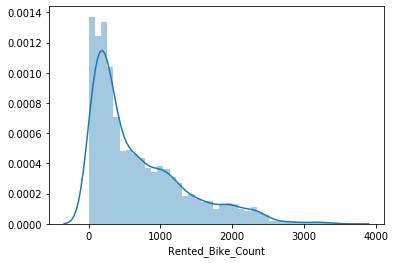

In [653]:
sns.distplot(train.Rented_Bike_Count)

In [654]:
train.Rented_Bike_Count.skew(), train.Rented_Bike_Count.kurt()

(1.2658926650307742, 1.099637910278993)

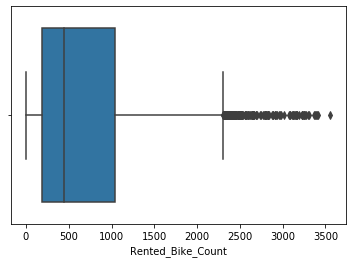

In [655]:
sns.boxplot(train.Rented_Bike_Count)

In [656]:
train[train.Rented_Bike_Count>2500].shape

(86, 15)

In [657]:
train.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


#### Feature analysis

#### Date

In [658]:
train.Date.nunique(),test.Date.nunique()

(293, 72)

In [659]:
train.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Rented_Bike_Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [660]:
test.head()

,Index,Date,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [661]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

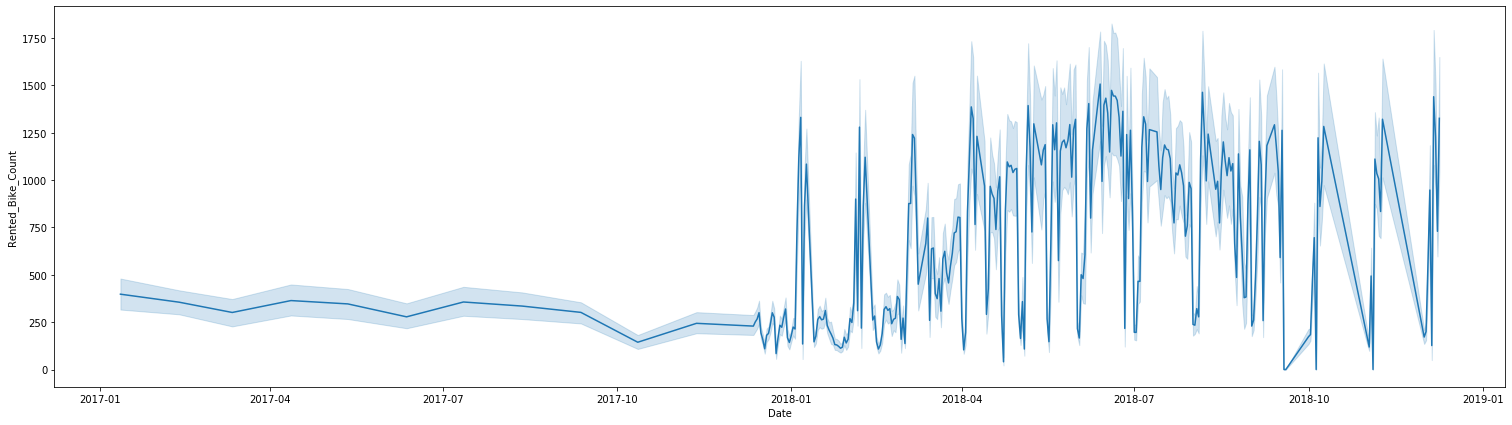

In [662]:
plt.figure(figsize = (26,7))
sns.lineplot(train.Date,train.Rented_Bike_Count)

#### Hour

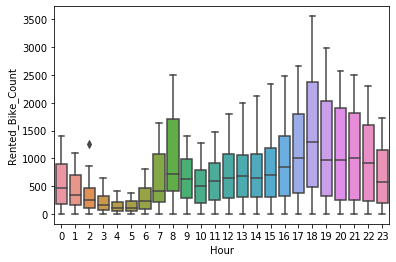

In [663]:
sns.boxplot(train.Hour,train.Rented_Bike_Count)

#### Temperature

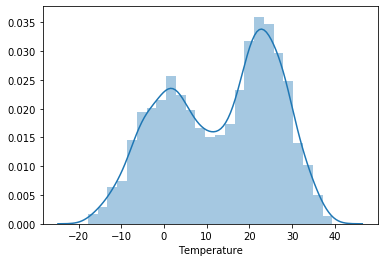

In [664]:
sns.distplot(train.Temperature)

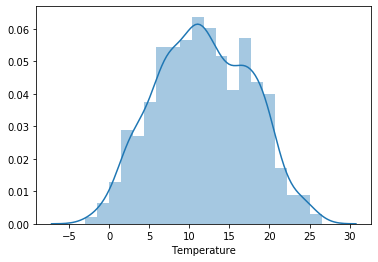

In [665]:
sns.distplot(test.Temperature)

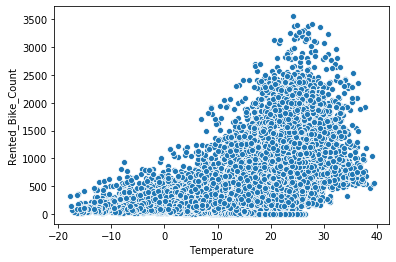

In [666]:
sns.scatterplot(train.Temperature,train.Rented_Bike_Count)

#### Humidity

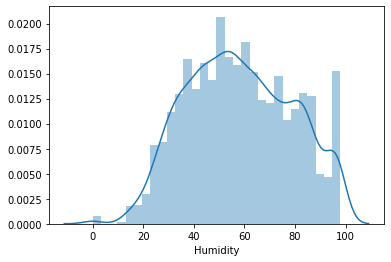

In [667]:
sns.distplot(train.Humidity)

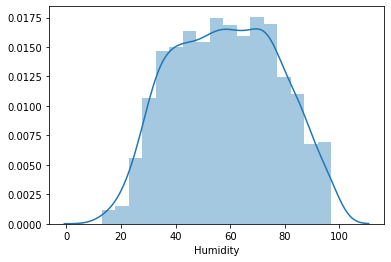

In [668]:
sns.distplot(test.Humidity)

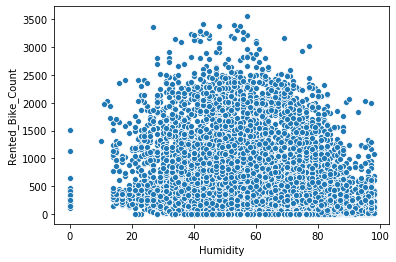

In [669]:
sns.scatterplot(train.Humidity,train.Rented_Bike_Count)

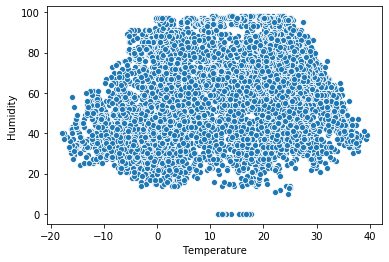

In [670]:
sns.scatterplot(train.Temperature,train.Humidity)

#### Wind Speed

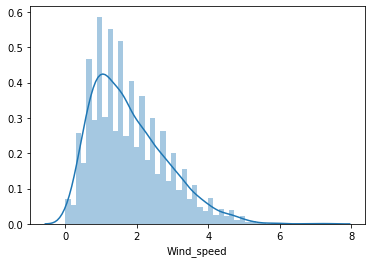

In [671]:
sns.distplot(train.Wind_speed) ##take log1p

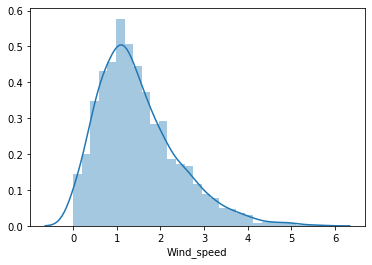

In [672]:
sns.distplot(test.Wind_speed)

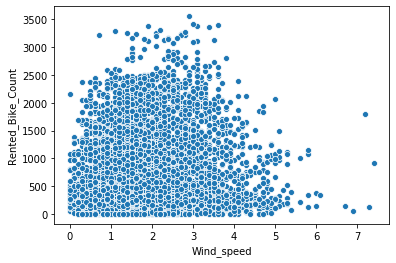

In [673]:
sns.scatterplot(train.Wind_speed,train.Rented_Bike_Count)

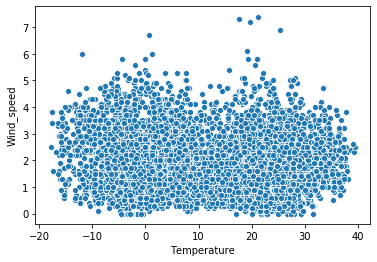

In [674]:
sns.scatterplot(train.Temperature,train.Wind_speed)

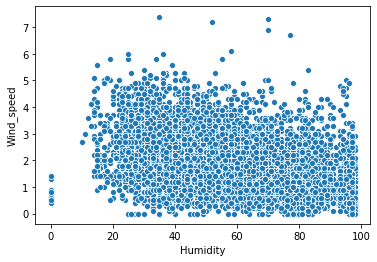

In [675]:
sns.scatterplot(train.Humidity,train.Wind_speed)

#### Visibility

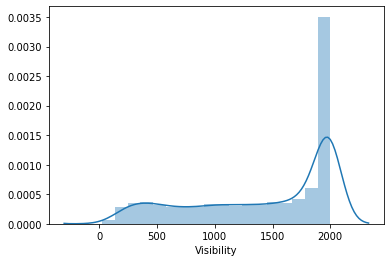

In [676]:
sns.distplot(train.Visibility)

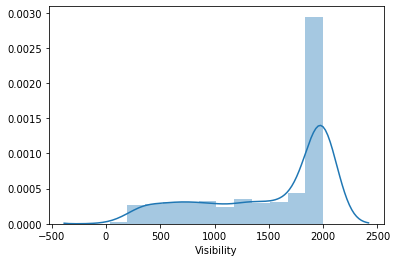

In [677]:
sns.distplot(test.Visibility)

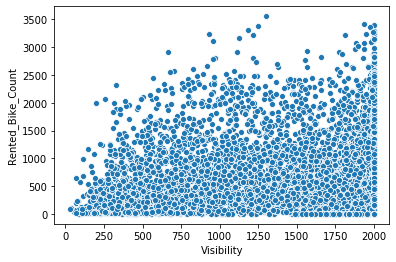

In [678]:
sns.scatterplot(train.Visibility,train.Rented_Bike_Count)

#### Dew point temperature

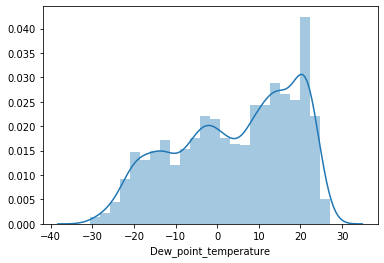

In [679]:
sns.distplot(train.Dew_point_temperature)

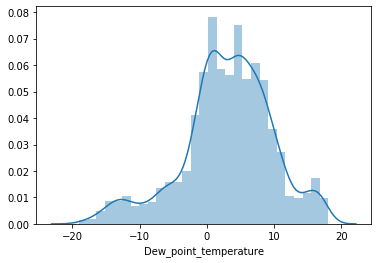

In [680]:
sns.distplot(test.Dew_point_temperature)

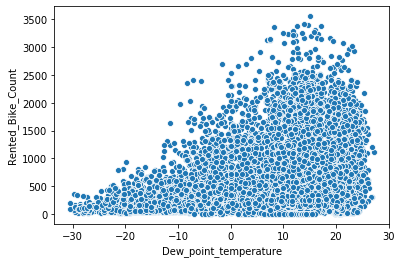

In [681]:
sns.scatterplot(train.Dew_point_temperature,train.Rented_Bike_Count)

#### Solar radiation

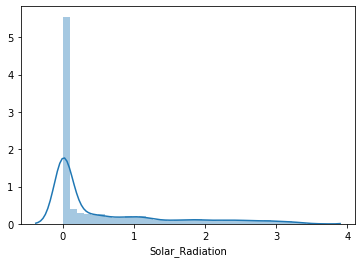

In [682]:
sns.distplot(train.Solar_Radiation)

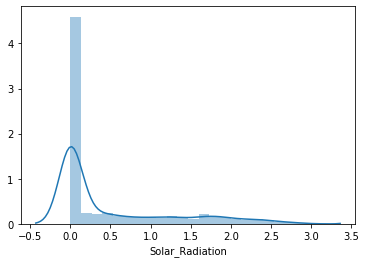

In [683]:
sns.distplot(test.Solar_Radiation)

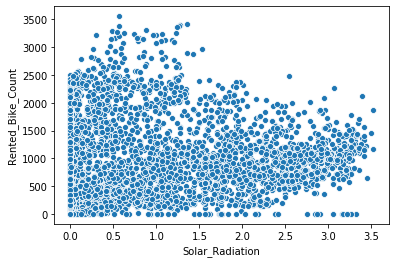

In [684]:
sns.scatterplot(train.Solar_Radiation,train.Rented_Bike_Count)

#### Rainfall

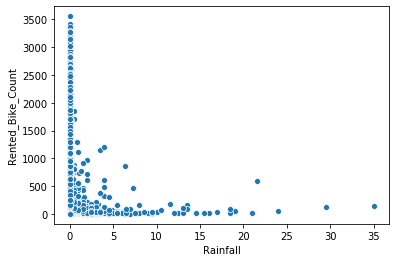

In [685]:
sns.scatterplot(train.Rainfall,train.Rented_Bike_Count)

#### Snowfall

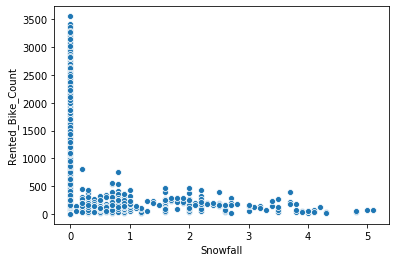

In [686]:
sns.scatterplot(train.Snowfall,train.Rented_Bike_Count)

#### Season

In [687]:
train.Seasons.value_counts()

Spring    2208
Summer    2208
Winter    2160
Autumn     456
Name: Seasons, dtype: int64

In [688]:
test.Seasons.value_counts()

Autumn    1728
Name: Seasons, dtype: int64

#### Holiday

In [689]:
train.Holiday.value_counts()

No Holiday    6720
Holiday        312
Name: Holiday, dtype: int64

In [690]:
test.Holiday.value_counts()

No Holiday    1608
Holiday        120
Name: Holiday, dtype: int64

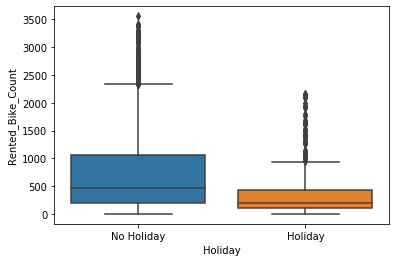

In [691]:
sns.boxplot(train.Holiday,train.Rented_Bike_Count)

#### Functioning day

In [692]:
train.Functioning_Day.value_counts()

Yes    6936
No       96
Name: Functioning_Day, dtype: int64

In [693]:
test.Functioning_Day.value_counts()

Yes    1529
No      199
Name: Functioning_Day, dtype: int64

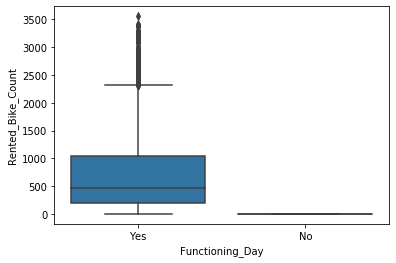

In [694]:
sns.boxplot(train.Functioning_Day,train.Rented_Bike_Count)

### Engineering Features

In [695]:
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)

In [696]:
df.head()

,Date,Dew_point_temperature,Functioning_Day,Holiday,Hour,Humidity,Index,Rainfall,Rented_Bike_Count,Seasons,Snowfall,Solar_Radiation,Temperature,Visibility,Wind_speed
0,2017-01-12,-17.6,Yes,No Holiday,0,37,0,0.0,254.0,Winter,0.0,0.0,-5.2,2000,2.2
1,2017-01-12,-17.6,Yes,No Holiday,1,38,1,0.0,204.0,Winter,0.0,0.0,-5.5,2000,0.8
2,2017-01-12,-17.7,Yes,No Holiday,2,39,2,0.0,173.0,Winter,0.0,0.0,-6.0,2000,1.0
3,2017-01-12,-17.6,Yes,No Holiday,3,40,3,0.0,107.0,Winter,0.0,0.0,-6.2,2000,0.9
4,2017-01-12,-18.6,Yes,No Holiday,4,36,4,0.0,78.0,Winter,0.0,0.0,-6.0,2000,2.3


In [697]:
df['month'] = df.Date.dt.month
df['weekday'] = df.Date.dt.weekday
df['week_of_year'] = df.Date.dt.weekofyear
df['day'] = df.Date.dt.day
df['quarter'] = df.Date.dt.quarter

In [698]:
df['Temp_diff'] = df.Temperature - df.Dew_point_temperature

In [699]:
df.Wind_speed = np.log1p(df.Wind_speed)

In [700]:
df = pd.concat([df,pd.get_dummies(df[['Holiday','Functioning_Day']].astype('category'))],axis=1)

In [701]:
train = df.iloc[:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [702]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
Date                     7032 non-null datetime64[ns]
Dew_point_temperature    7032 non-null float64
Functioning_Day          7032 non-null object
Holiday                  7032 non-null object
Hour                     7032 non-null int64
Humidity                 7032 non-null int64
Index                    7032 non-null int64
Rainfall                 7032 non-null float64
Rented_Bike_Count        7032 non-null float64
Seasons                  7032 non-null object
Snowfall                 7032 non-null float64
Solar_Radiation          7032 non-null float64
Temperature              7032 non-null float64
Visibility               7032 non-null int64
Wind_speed               7032 non-null float64
month                    7032 non-null int64
weekday                  7032 non-null int64
week_of_year             7032 non-null int64
day                      7032 non-null int64
quarter     

In [703]:
label = train.Rented_Bike_Count
train.drop(columns=['Date','Index','Seasons','Holiday','Functioning_Day','Rented_Bike_Count'],inplace=True)
test.drop(columns=['Date','Index','Seasons','Holiday','Functioning_Day','Rented_Bike_Count'],inplace=True)

### Modelling

In [704]:
def func(m,train,label,test,cv,rnd_st):
    tr=[]
    te=[]
    pred = pd.DataFrame(np.zeros(shape=(test.shape[0],cv)))
    splitends = KFold(n_splits=cv,random_state=rnd_st)
    
    for i,(tr_index,te_index) in (enumerate(splitends.split(train,label))):
        xtrain,xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain,ytest = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict(xtrain)
        te_pred = m.predict(xtest)
        
        tr.append(np.sqrt(mean_squared_error(ytrain,tr_pred)))
        te.append(np.sqrt(mean_squared_error(ytest,te_pred)))
        print(np.sqrt(mean_squared_error(ytrain,tr_pred)),'\t\t\t\t',np.sqrt(mean_squared_error(ytest,te_pred)))
        
        pred.iloc[:,i] = m.predict(test)
    pd.Series(m.feature_importances_,index=train.columns).sort_values().plot.barh()
    print(np.mean(tr),'\t\t',np.mean(te))    
    return pred

In [705]:
seed = 2356100

58.649208396308254 				 111.44843241248778
56.2965971385824 				 147.77306936787588
45.90673576353402 				 305.2284656675039
43.35084834400859 				 341.67861946409204
46.76127855009314 				 357.0818571800678
50.19293363850528 		 252.64208881840545


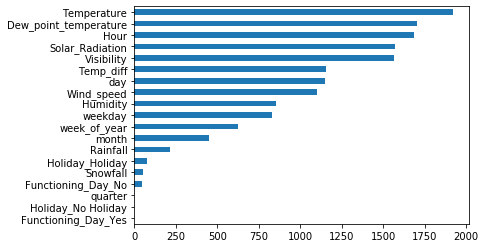

In [722]:
predicted = func(lgb.LGBMRegressor(n_estimators=500,random_state=seed),train,label,test,5,seed)

In [723]:
predicted.head()

,0,1,2,3,4
0,784.762309,865.196714,977.622340,800.762736,939.327719
1,669.242210,653.643446,746.040372,657.319544,692.047483
2,500.815091,464.003992,463.247377,445.447566,528.069844
3,311.757729,213.252177,324.642674,329.911984,317.616398
4,274.834487,244.043723,298.319513,252.162183,186.634441


In [724]:
ans = np.mean(predicted,axis=1)

In [725]:
final = ans.astype('int')

In [726]:
sample = pd.DataFrame(np.zeros(shape=(test.shape[0],2)),columns=['Index','Rented Bike Count'])
sample['Rented Bike Count'] = final
sample.Index = idx

In [727]:
sample['Rented Bike Count'] = sample['Rented Bike Count'].apply(lambda x: x if x>=0 else x*(-1))

In [728]:
sample.shape

(1728, 2)

In [729]:
sample.to_csv('predict2.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'predict2.csv'